In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score






In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv("database.csv")


data = data.rename(columns={
    "Date": "date",
    "Time": "time",
    "Latitude": "latitude",
    "Longitude": "longitude",
    "Depth": "depth",
    "Magnitude": "magnitudo",
    "Type": "type"
})


data['date'] = pd.to_datetime(data['date'], utc=True, errors='coerce')


data = data[data['type'] == 'Earthquake']


data['year'] = data['date'].dt.year
data = data.dropna(subset=['date', 'magnitudo'])
print(f"Data ready. Total Earthquake records: {len(data)}")
data.head()

Data ready. Total Earthquake records: 23229


,date,time,latitude,longitude,type,depth,Depth Error,Depth Seismic Stations,magnitudo,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0


In [217]:
data.describe()

,latitude,longitude,depth,Depth Error,Depth Seismic Stations,magnitudo,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,year
count,23229.000000,23229.000000,23229.000000,4448.000000,7083.000000,23229.000000,315.000000,2460.000000,7285.000000,1595.000000,1144.000000,17245.000000,23229.000000
mean,1.386072,39.742802,71.294448,4.919304,275.794437,5.882790,0.066197,47.608943,43.808980,4.006932,6.704676,1.023499,1992.718326
std,29.929232,125.754875,122.922124,4.679943,161.973252,0.424051,0.039592,63.127239,30.949339,5.389051,4.629406,0.186945,14.438730
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000,1965.000000
25%,-18.719000,-76.380000,15.000000,1.800000,147.000000,5.600000,0.046000,9.750000,24.100000,0.963300,5.300000,0.900000,1981.000000
50%,-3.684000,106.327000,33.000000,3.500000,255.000000,5.700000,0.058000,28.000000,36.000000,2.332000,6.700000,1.000000,1994.000000
75%,24.968000,145.297000,54.800000,6.200000,384.000000,6.000000,0.073000,62.000000,53.800000,4.730000,8.000000,1.130000,2005.000000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.350000,821.000000,360.000000,37.874000,99.000000,3.220000,2016.000000


In [218]:
num_rows = data.shape[0]
print("Number of rows:", num_rows)

Number of rows: 23229


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23229 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   date                        23229 non-null  datetime64[ns, UTC]
 1   time                        23229 non-null  object             
 2   latitude                    23229 non-null  float64            
 3   longitude                   23229 non-null  float64            
 4   type                        23229 non-null  object             
 5   depth                       23229 non-null  float64            
 6   Depth Error                 4448 non-null   float64            
 7   Depth Seismic Stations      7083 non-null   float64            
 8   magnitudo                   23229 non-null  float64            
 9   Magnitude Type              23226 non-null  object             
 10  Magnitude Error             315 non-null    float64            

In [220]:
data.isna().sum()

date                              0
time                              0
latitude                          0
longitude                         0
type                              0
depth                             0
Depth Error                   18781
Depth Seismic Stations        16146
magnitudo                         0
Magnitude Type                    3
Magnitude Error               22914
Magnitude Seismic Stations    20769
Azimuthal Gap                 15944
Horizontal Distance           21634
Horizontal Error              22085
Root Mean Square               5984
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
year                              0
dtype: int64

In [221]:
null_dates = data[data['date'].isna()]
null_dates

,date,time,latitude,longitude,type,depth,Depth Error,Depth Seismic Stations,magnitudo,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year


In [222]:
not_null_dates = data[data['date'].notna()]
not_null_dates

,date,time,latitude,longitude,type,depth,Depth Error,Depth Seismic Stations,magnitudo,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
0,1965-01-02 00:00:00+00:00,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
1,1965-01-04 00:00:00+00:00,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
2,1965-01-05 00:00:00+00:00,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
3,1965-01-08 00:00:00+00:00,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
4,1965-01-09 00:00:00+00:00,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28 00:00:00+00:00,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016.0
23408,2016-12-28 00:00:00+00:00,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016.0
23409,2016-12-28 00:00:00+00:00,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016.0
23410,2016-12-29 00:00:00+00:00,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016.0


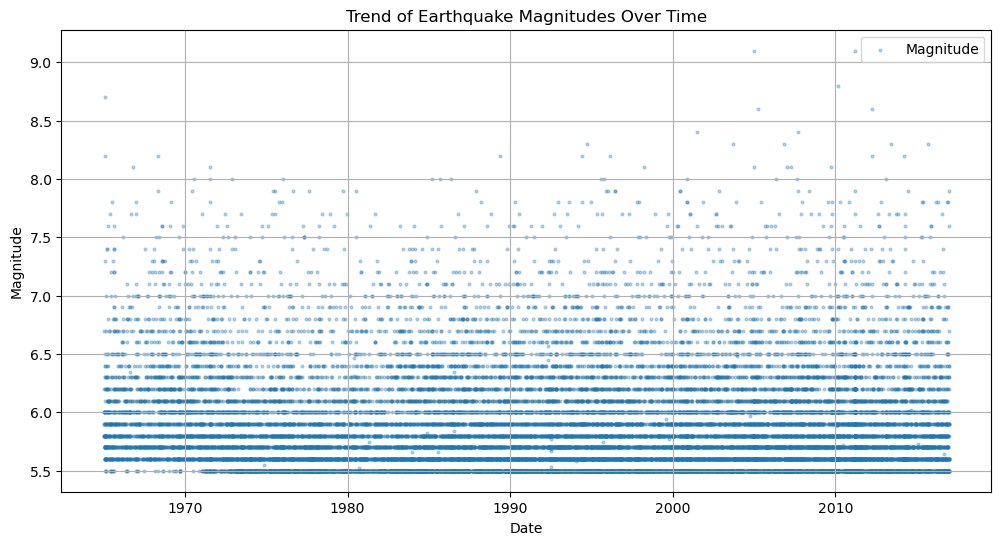

In [ ]:

data['date'] = pd.to_datetime(data['date'])


df_cleaned = data[data["magnitudo"] > 0]


plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['date'], df_cleaned["magnitudo"], alpha=0.3, s=4, label="Magnitude")
plt.title("Trend of Earthquake Magnitudes Over Time")
plt.xlabel("Date")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()


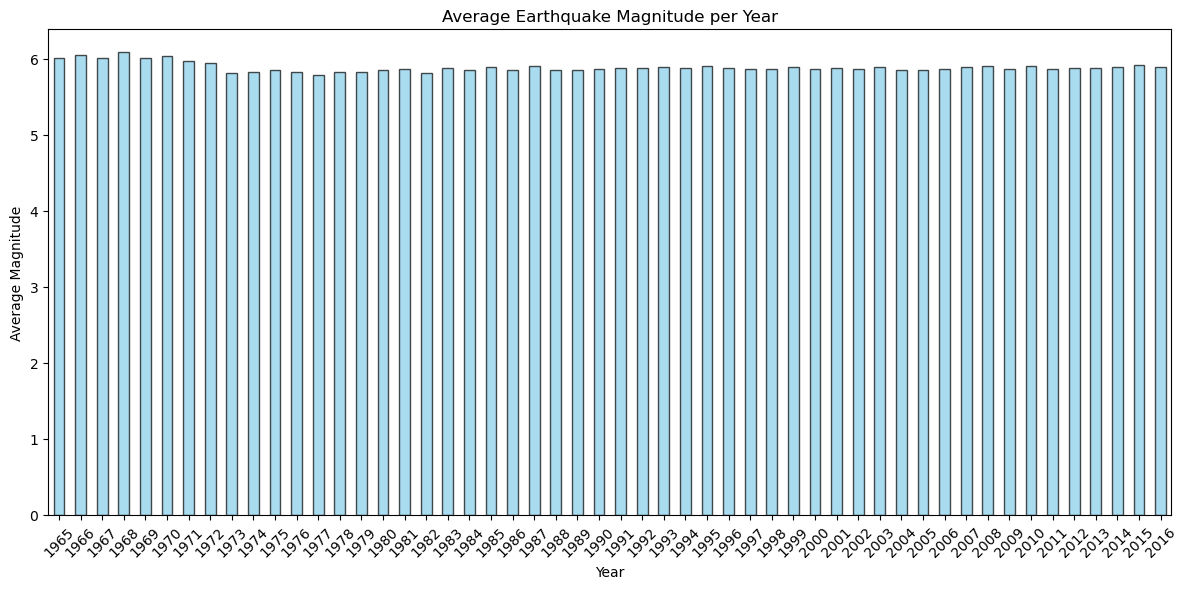

In [ ]:

data['year'] = pd.to_datetime(data['date']).dt.year
magnitude_per_year = data.groupby('year')["magnitudo"].mean()


plt.figure(figsize=(12, 6))
magnitude_per_year.plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black')
plt.title("Average Earthquake Magnitude per Year")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


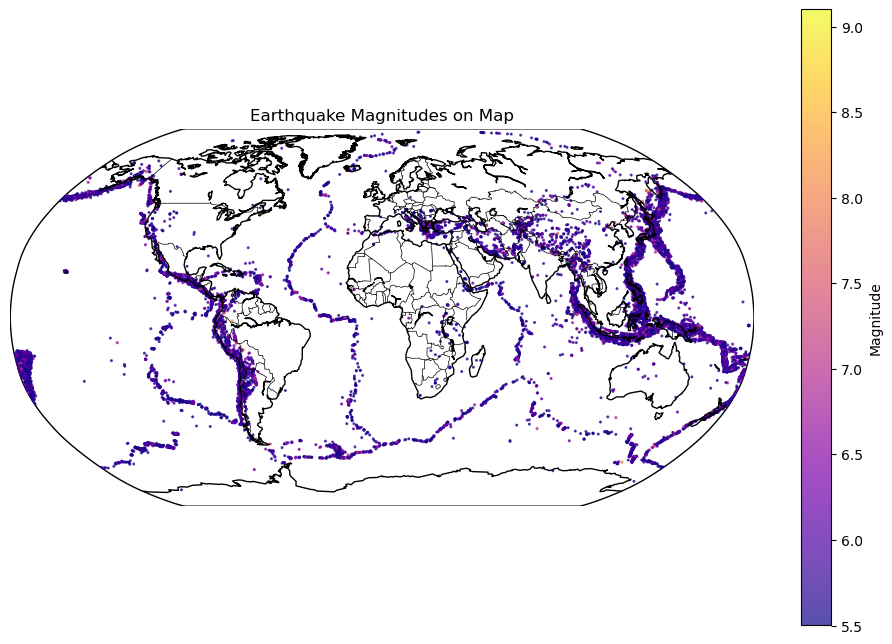

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


df = pd.DataFrame({
    "latitude": data.latitude,
    "longitude": data.longitude,
    "magnitude": data.magnitudo
})

df = df[df["magnitude"] > 0]


plt.figure(figsize=(12, 8))


m = Basemap(projection='robin', lon_0=0)

m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map projection coordinates
x, y = m(df['longitude'].values, df['latitude'].values)

# Scatter plot with the size of the markers based on magnitude
m.scatter(x, y, c=df['magnitude'], s=df['magnitude'] * 1, cmap='plasma', alpha=0.7, marker='.')

# Add color bar
plt.colorbar(label='Magnitude')

# Add title
plt.title("Earthquake Magnitudes on Map")

# Show the plot
plt.show()


Mean Squared Error (MSE): 0.1686
Root Mean Squared Error (RMSE): 0.4106
Mean Absolute Error (MAE): 0.3090
R² Score: 0.0021


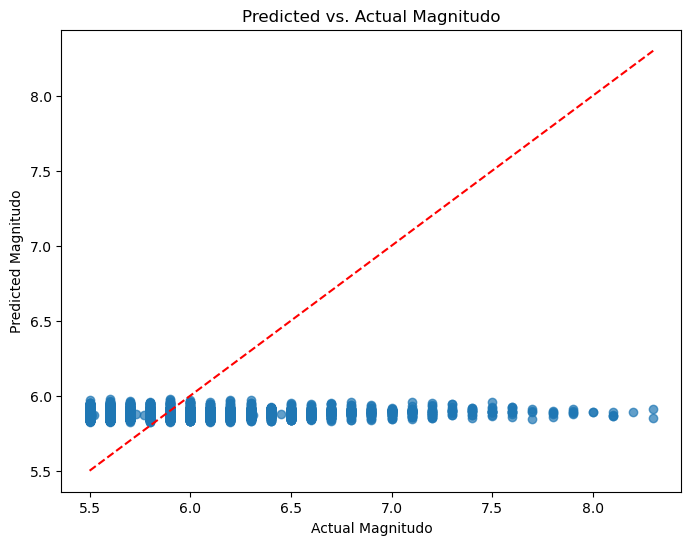

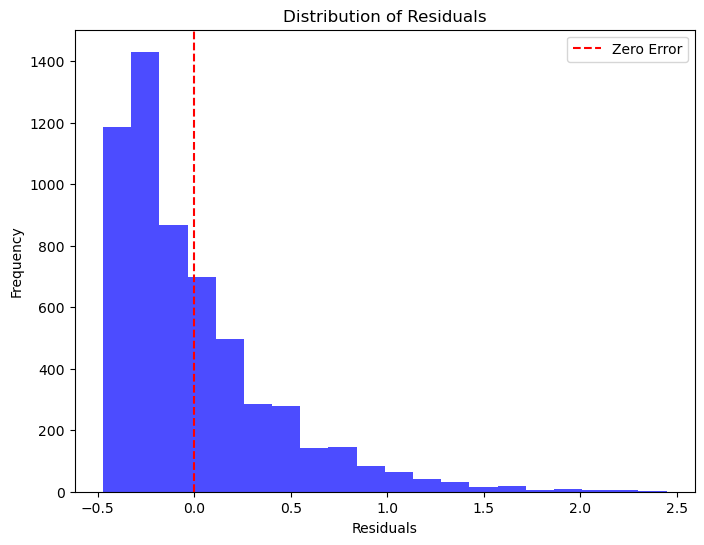

In [226]:
# Linear Regression with Negative values
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


numerical_columns = ["magnitudo", "depth", "latitude", "longitude"]
data_numeric = data[numerical_columns]
X = data_numeric.drop(columns=["magnitudo"])
y = data_numeric["magnitudo"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Predicted vs. Actual Magnitudo")
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()




Mean Squared Error (MSE): 0.1686
Root Mean Squared Error (RMSE): 0.4106
Mean Absolute Error (MAE): 0.3090
R² Score: 0.0021


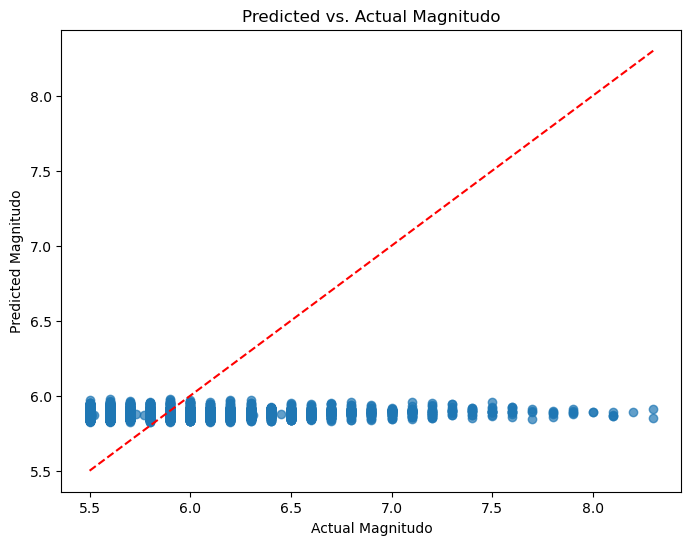

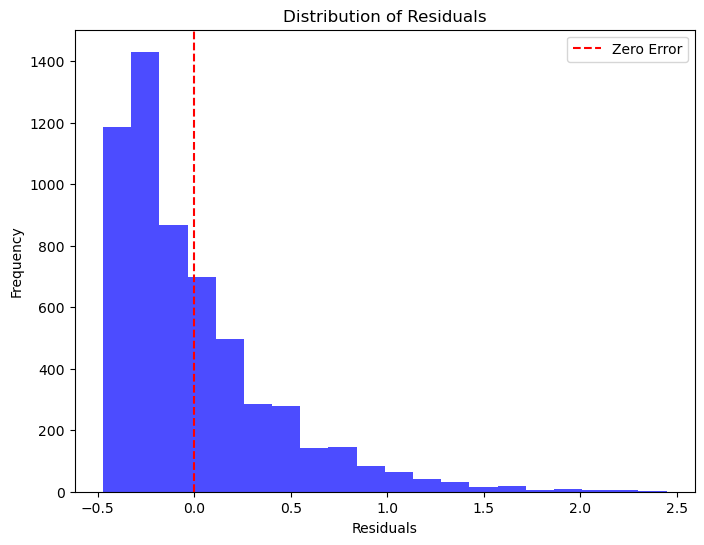

In [227]:
# Linear Regression without negative values
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Preprocess the data: Keep only rows with positive magnitudes
data_positive = data[data["magnitudo"] > 0]


numerical_columns = ["magnitudo", "depth", "latitude", "longitude"]
data_numeric = data_positive[numerical_columns]


X = data_numeric.drop(columns=["magnitudo"])
y = data_numeric["magnitudo"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Predicted vs. Actual Magnitudo")
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()


Ridge Regression Metrics:
Mean Squared Error (MSE): 0.1686
Root Mean Squared Error (RMSE): 0.4106
Mean Absolute Error (MAE): 0.3090
R² Score: 0.0021

Lasso Regression Metrics:
Mean Squared Error (MSE): 0.1686
Root Mean Squared Error (RMSE): 0.4106
Mean Absolute Error (MAE): 0.3089
R² Score: 0.0021

Ridge Coefficients: [0.00010628 0.00041649 0.00012005]
Lasso Coefficients: [9.76926048e-05 3.03673437e-04 1.18576463e-04]


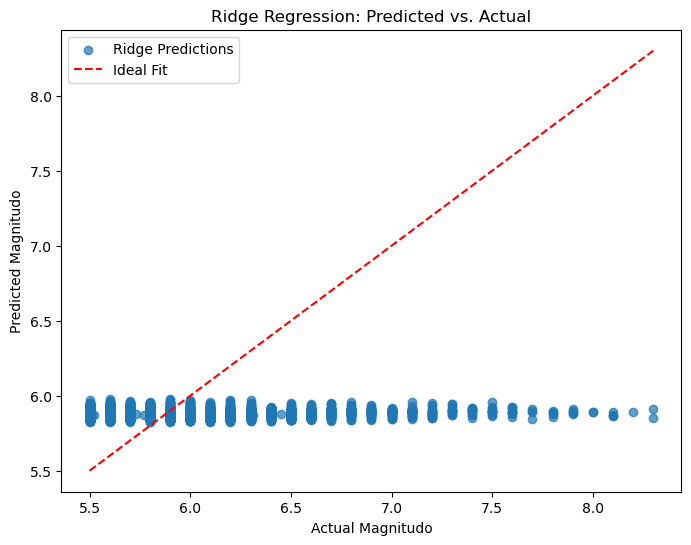

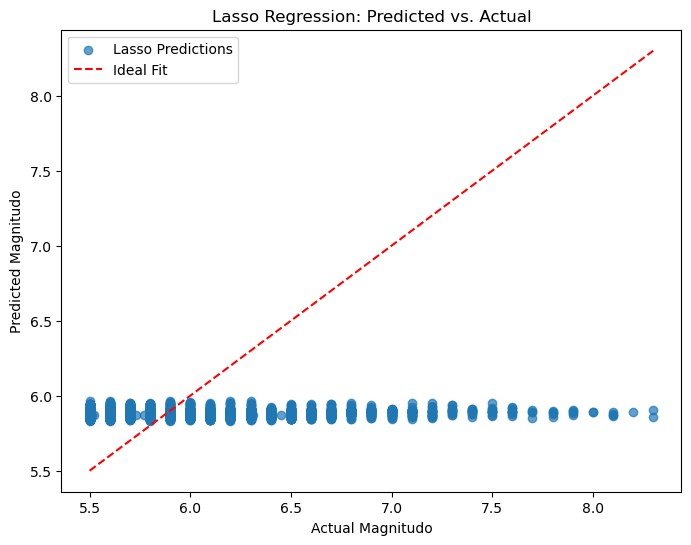

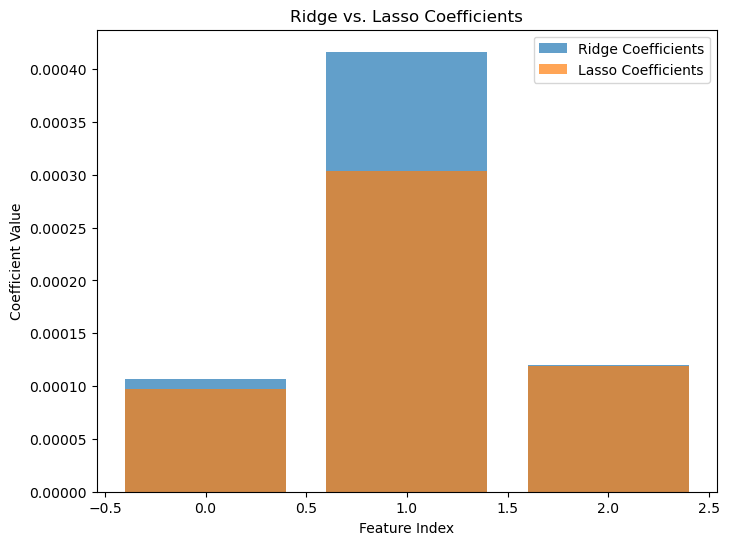

In [228]:
#Ridge and Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = ["depth", "latitude", "longitude"]  
X = data[numerical_columns]
y = data["magnitudo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ---- Ridge Regression ----
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")

# ---- Lasso Regression ----
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")

# Compare Coefficients
print("\nRidge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)



# Plot 1: Predicted vs. Actual for Ridge
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, label="Ridge Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Ridge Regression: Predicted vs. Actual")
plt.legend()
plt.show()

# Plot 2: Predicted vs. Actual for Lasso
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.7, label="Lasso Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Lasso Regression: Predicted vs. Actual")
plt.legend()
plt.show()

# Plot 3: Coefficients Comparison
plt.figure(figsize=(8, 6))
indices = range(len(ridge.coef_))
plt.bar(indices, ridge.coef_, alpha=0.7, label="Ridge Coefficients")
plt.bar(indices, lasso.coef_, alpha=0.7, label="Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge vs. Lasso Coefficients")
plt.legend()
plt.show()


Random Forest Regression Metrics:
Mean Squared Error (MSE): 0.1716
Root Mean Squared Error (RMSE): 0.4143
Mean Absolute Error (MAE): 0.3091
R² Score: -0.0050

Feature Importances:
depth: 0.3248
latitude: 0.3291
longitude: 0.3461


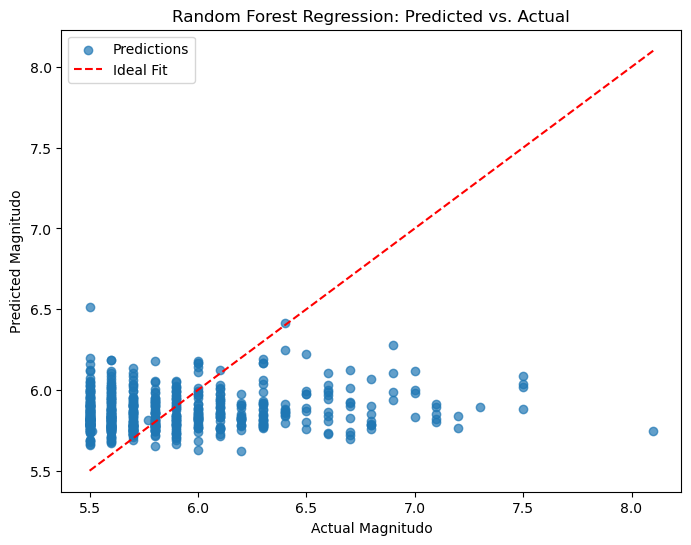

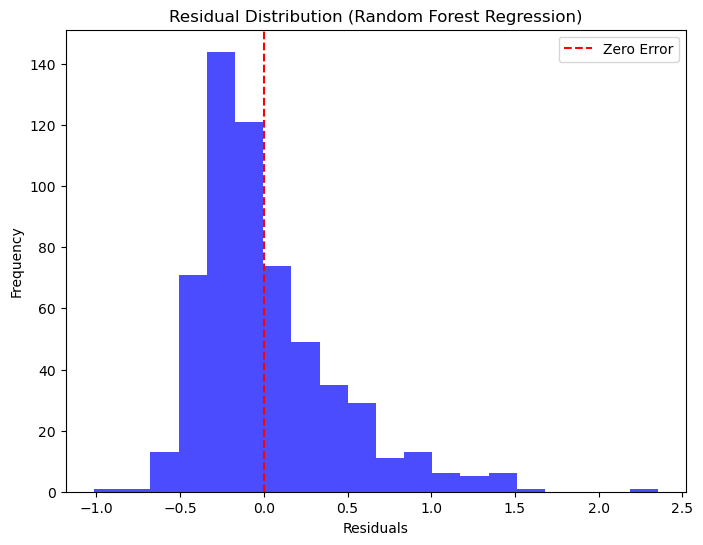

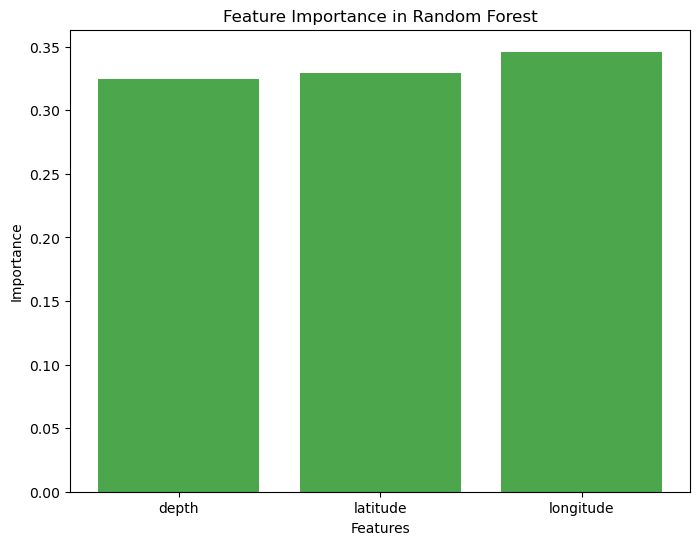

In [229]:
#Random Forest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

data_sample = data.sample(frac=0.1, random_state=42)

numerical_columns = ["depth", "latitude", "longitude"]
X = data_sample[numerical_columns].values
y = data_sample["magnitudo"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=20,         # Fewer trees for faster training
    max_depth=10,            # Limit depth to control complexity
    max_features='sqrt',     # Use a subset of features at each split
    n_jobs=-1,               # Utilize all CPU cores
    random_state=42          # Reproducibility
)
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
# Calculate performance metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Random Forest Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")



# Feature importance
feature_importance = rf_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(numerical_columns, feature_importance):
    print(f"{feature}: {importance:.4f}")


# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Random Forest Regression: Predicted vs. Actual")
plt.legend()
plt.show()

# Plot 2: Residual Distribution
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Random Forest Regression)")
plt.legend()
plt.show()

# Plot 3: Feature Importance
plt.figure(figsize=(8, 6))
plt.bar(numerical_columns, feature_importance, alpha=0.7, color='green')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


Support Vector Regression Metrics:
Mean Squared Error (MSE): 0.2057
Root Mean Squared Error (RMSE): 0.4535
Mean Absolute Error (MAE): 0.3044
R² Score: -0.2683


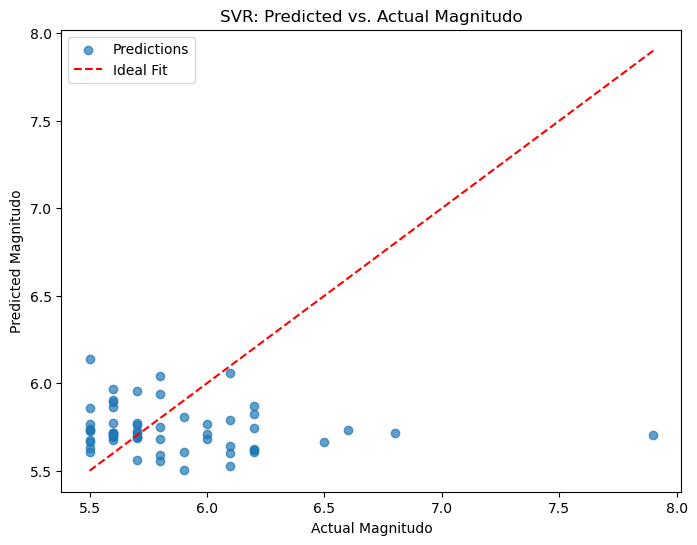

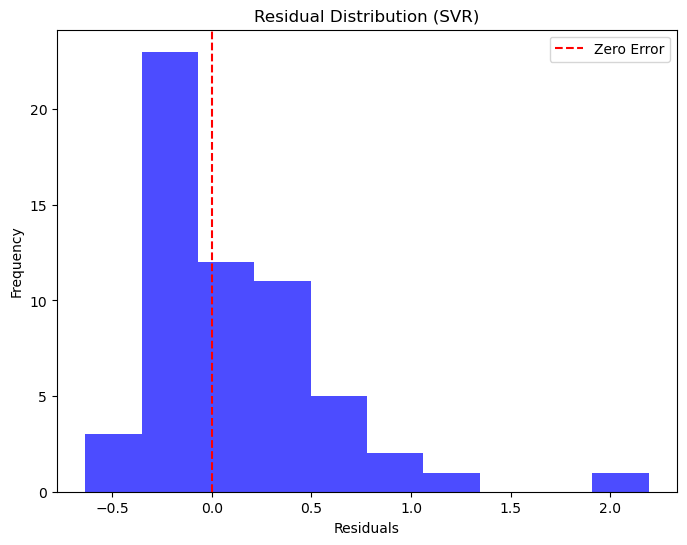

In [230]:
#support vector regression
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ---- Sample the Data ----
# Reduce dataset size by sampling (e.g., 10% of the data)
data_sample = data.sample(frac=0.01, random_state=42)

# Define features (X) and target variable (y)
numerical_columns = ["depth", "latitude", "longitude"]  # Features
X = data_sample[numerical_columns].values
y = data_sample["magnitudo"].values

# ---- Split and Scale Data ----
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features using StandardScaler (required for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ---- Initialize and Train the SVR Model ----
svr_model = SVR(kernel='rbf', C=10, epsilon=0.1)  # RBF kernel, regularization C=10, epsilon=0.1
svr_model.fit(X_train_scaled, y_train)
# ---- Predict on Test Data ----
y_test_pred = svr_model.predict(X_test_scaled)
# ---- Evaluate the Model ----
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print performance metrics
print("Support Vector Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

# ---- Visualization ----

# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("SVR: Predicted vs. Actual Magnitudo")
plt.legend()
plt.show()

# Plot 2: Residual Distribution
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (SVR)")
plt.legend()
plt.show()

Decision Tree Regression Metrics:
Mean Squared Error (MSE): 0.1636
Root Mean Squared Error (RMSE): 0.4045
Mean Absolute Error (MAE): 0.3021
R² Score: 0.0316


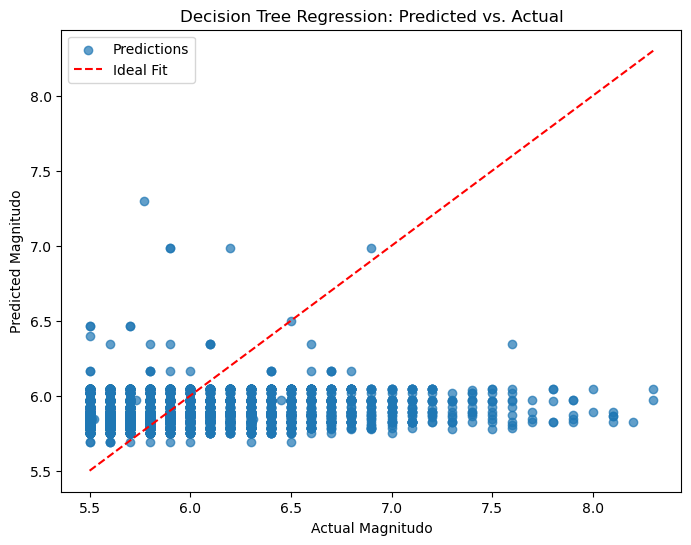

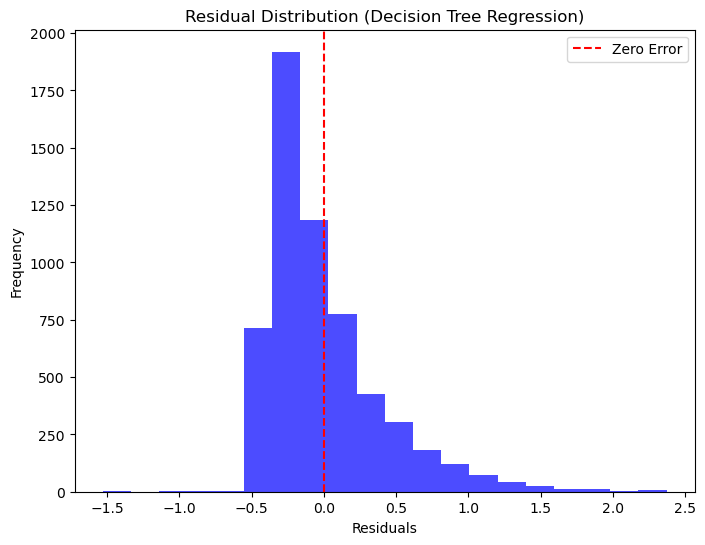

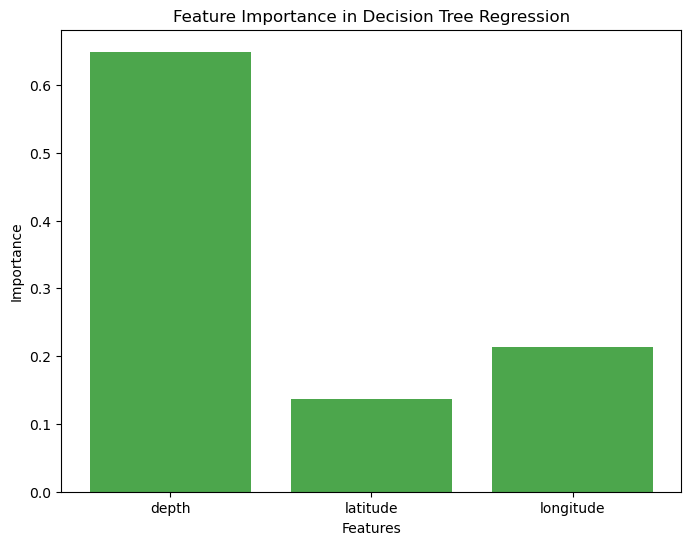

In [231]:
#Desicion Tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


numerical_columns = ["depth", "latitude", "longitude"]  
X = data[numerical_columns].values
y = data["magnitudo"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Set max_depth to avoid overfitting
tree_model.fit(X_train, y_train)
y_test_pred = tree_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Decision Tree Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")


# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("Decision Tree Regression: Predicted vs. Actual")
plt.legend()
plt.show()

# Plot 2: Residual Distribution
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Decision Tree Regression)")
plt.legend()
plt.show()

# Plot 3: Feature Importance
feature_importance = tree_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(numerical_columns, feature_importance, alpha=0.7, color='green')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Decision Tree Regression")
plt.show()


Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 30.7468 - mae: 5.5051 - val_loss: 14.6285 - val_mae: 3.7730
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1061 - mae: 2.7201 - val_loss: 1.4531 - val_mae: 1.0075
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4071 - mae: 1.1939 - val_loss: 1.0553 - val_mae: 0.8438
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0970 - mae: 1.1846 - val_loss: 0.9139 - val_mae: 0.7752
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7082 - mae: 1.0560 - val_loss: 0.7835 - val_mae: 0.6962
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5926 - mae: 1.0058 - val_loss: 0.6960 - val_mae: 0.6479
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3012 - mae: 0.9224 - val_loss: 0.4733 - val_mae: 0.5310
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1048 - mae: 0.8234 - val_loss: 0.4103 - val_mae: 0.4977
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.

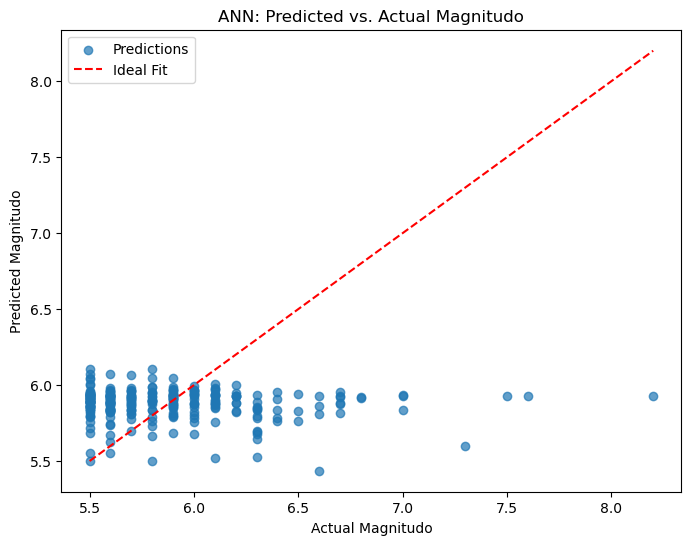

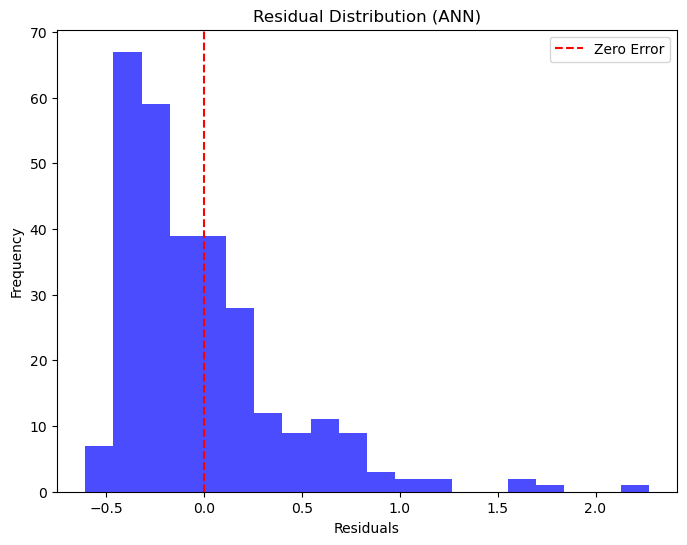

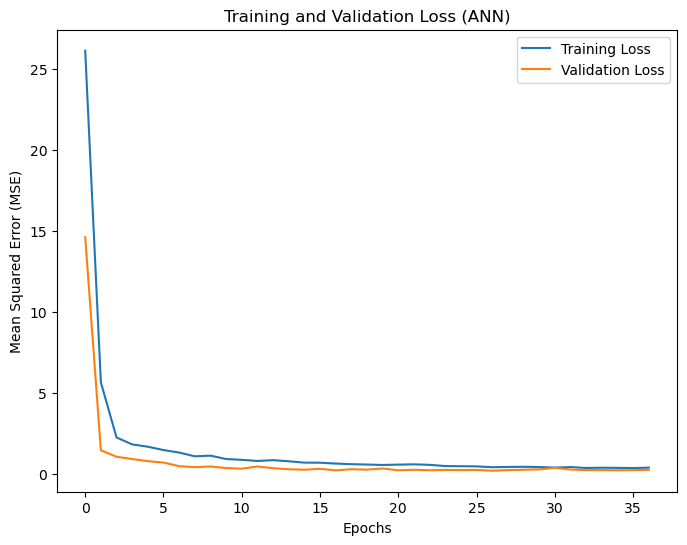

In [232]:
#artificial neural networks
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ---- Data Preparation ----
# Sample the data (5% for faster execution)
data_sample = data.sample(frac=0.05, random_state=42)

# Define features (X) and target variable (y)
numerical_columns = ["depth", "latitude", "longitude"]
X = data_sample[numerical_columns].values
y = data_sample["magnitudo"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features for ANN (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ---- Build the ANN Model ----
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Explicitly define the input layer
    Dense(64, activation='relu'),  # First hidden layer with 64 neurons
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dropout(0.2),  # Dropout
    Dense(16, activation='relu'),  # Third hidden layer with 16 neurons
    Dense(1, activation='linear')  # Output layer for regression
])
# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# ---- Train the Model ----
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,  # Train for 100 epochs (early stopping will stop earlier if needed)
    batch_size=16,  # Use smaller batch size for finer updates
    callbacks=[early_stopping],  # Apply early stopping
    verbose=1  # Show training progress
)
# ---- Evaluate the Model ----
y_test_pred = model.predict(X_test_scaled).flatten()
# Calculate performance metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nANN Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

# ---- Visualization ----

# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Magnitudo")
plt.ylabel("Predicted Magnitudo")
plt.title("ANN: Predicted vs. Actual Magnitudo")
plt.legend()
plt.show()

# Plot 2: Residual Distribution
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (ANN)")
plt.legend()
plt.show()

# Plot 3: Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Validation Loss (ANN)")
plt.legend()
plt.show()

In [265]:
# The model expects features in this order: [Depth, Latitude, Longitude]
# Your input: Latitude=31.46..., Longitude=76.27..., Depth=10.0

new_data = np.array([[10.0, 31.467339, 76.271511]])  # Corrected order

# Ensure tree_model is trained (Run Cell 17 first)
if 'tree_model' in globals():
    new_prediction = tree_model.predict(new_data)
    print(f"Predicted Magnitude: {new_prediction[0]:.2f}")
else:
    print("Error: Please run the Random Forest training cell (Cell 17) before predicting.")

Predicted Magnitude: 5.86
